<a href="https://colab.research.google.com/github/gyaneshr7/hotel_booking_analysis/blob/main/hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In recent years, City Hotel and Resort Hotel have seen high cancellation rates.
 Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal room use.Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue.

**Importing** **libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hotelBooking.csv')

**Exploratory Data Analysis and Data Cleaning**

In [ ]:
#exploring the head and the tail of the dataset

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01-07-2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01-07-2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02-07-2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02-07-2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,03-07-2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,06-09-2017,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,07-09-2017,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,07-09-2017,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,07-09-2017,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,07-09-2017,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [ ]:
# dropping the columns containing the customer's personal data

df.drop(df.columns[[32, 33, 34, 35]], axis=1, inplace=True)

df.shape

(119390, 32)

In [ ]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#converting the datatype of reservation date which is an object to datetime datatype

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
#summary statistics of only object type columns

df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [ ]:
for cols in df.describe(include = 'object').columns:
  print(cols)
  print(df[cols].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
#removing unwanted columns and null values(data cleaning)

df.drop(['company','agent'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000
mean,0.371348,104.313784,2016.157678,27.166737,15.800907,0.928878,2.502111,1.858395,0.104126,0.007788,0.032012,0.087145,0.131638,0.221147,2.330833,101.958626,0.061887,0.571686
std,0.483167,106.904302,0.707455,13.589887,8.780407,0.996181,1.900065,0.578580,0.398146,0.089238,0.176032,0.845883,1.484697,0.652764,17.630744,48.091689,0.244176,0.792686
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,3.000000,2.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


In [ ]:
#removing the outliers

df = df[df['children'] < 4]
df = df[df['babies'] < 4]
df = df[df['adr'] < 5000]

**Data Analysis and Visualization**

0    0.628652
1    0.371348
Name: is_canceled, dtype: float64


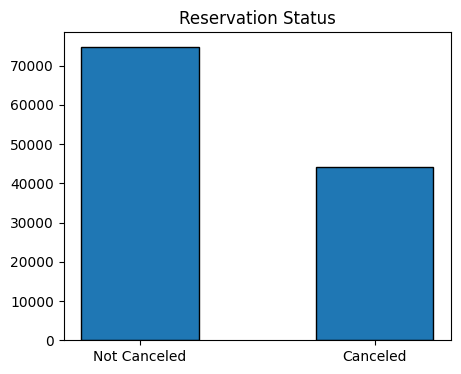

In [ ]:
#determing the percentage of canceled as well as not_canceled data and plotting it in a bar graph

cancelled_percent = df['is_canceled'].value_counts(normalize= True)
print(cancelled_percent)

plt.figure(figsize = (5,4))
plt.title('Reservation Status')
plt.bar(['Not Canceled', 'Canceled'], df['is_canceled'].value_counts(), edgecolor = 'black', width = 0.5)
plt.show()

Text(0, 0.5, 'Number of Reservations')

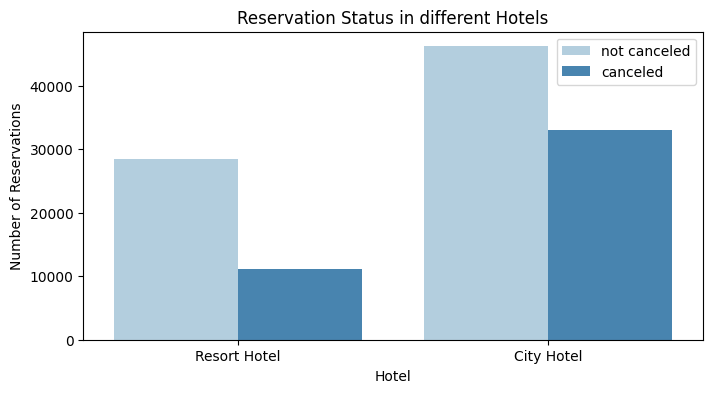

In [ ]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'Blues')
legend_labels = ax1.get_legend_handles_labels()

plt.title('Reservation Status in different Hotels')
plt.legend(['not canceled', 'canceled'])
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')


In [ ]:
# determing the percentage of cancelled and not cancelled reservations for both the hotels

resort_hotels = df[df['hotel'] == 'Resort Hotel']
resort_hotels['is_canceled'].value_counts(normalize = True)

0    0.720268
1    0.279732
Name: is_canceled, dtype: float64

In [ ]:
city_hotels = df[df['hotel'] == 'City Hotel']
city_hotels['is_canceled'].value_counts(normalize = True)

0    0.582908
1    0.417092
Name: is_canceled, dtype: float64

In [ ]:
# determine the mean adr of both the hotels on the basis of the date of reservation

resort_hotels = resort_hotels.groupby('reservation_status_date')[['adr']].mean()
city_hotels = city_hotels.groupby('reservation_status_date')[['adr']].mean()

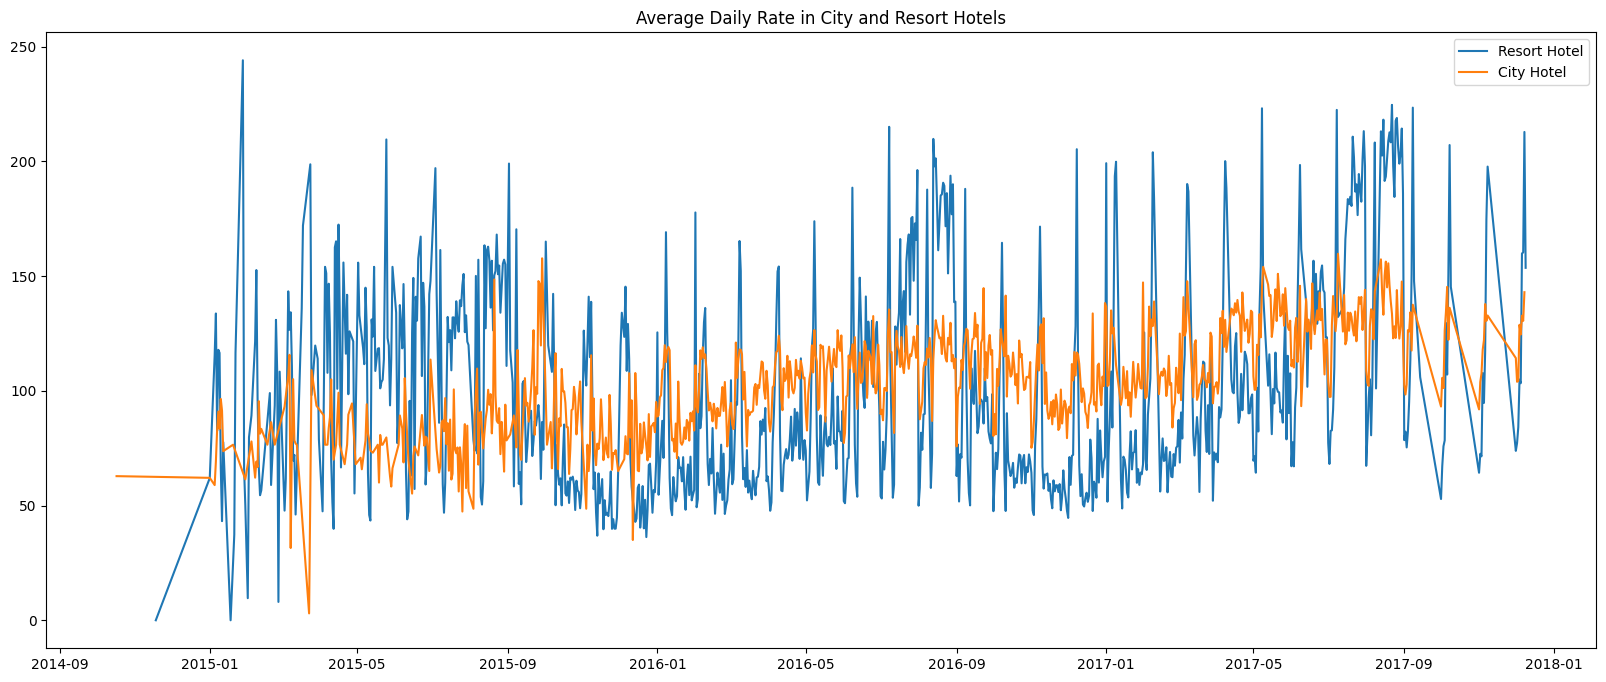

In [ ]:
# the spikes in the graph represent the hike in prices of resort and city hotels on weekends

plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotels')
plt.plot(resort_hotels.index,resort_hotels['adr'], label = 'Resort Hotel')
plt.plot(city_hotels.index,city_hotels['adr'], label = 'City Hotel')
plt.legend()
plt.show()

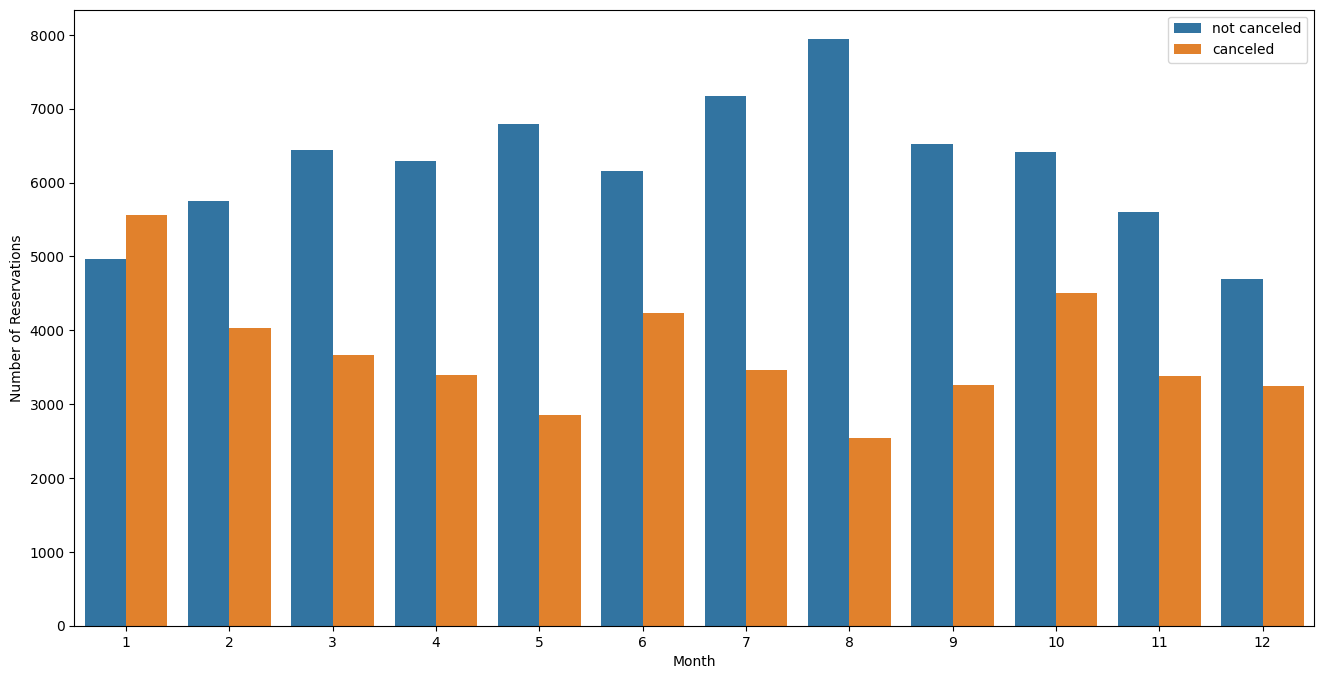

In [ ]:
# classify the cancelled and not cancelled data into months

df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df)

legend_labels = ax1.get_legend_handles_labels()
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()


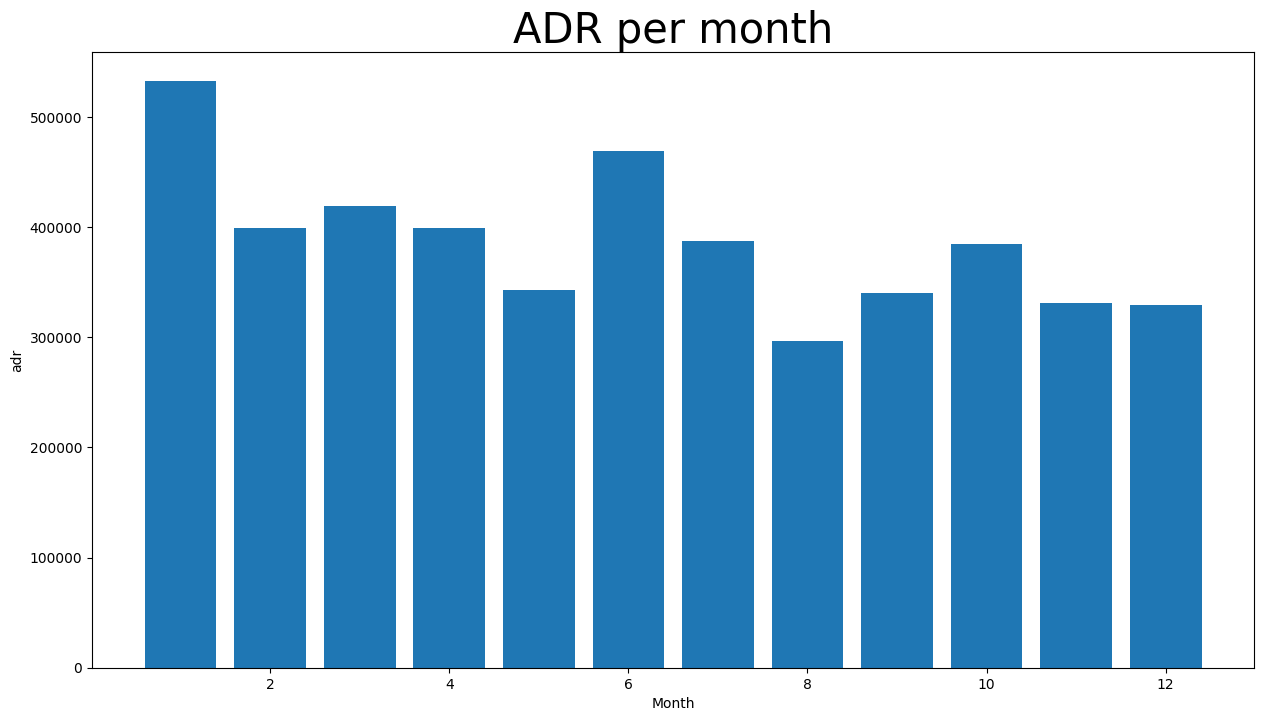

In [ ]:
#determine that whether price has any effect on the cancellation of reservations by plotting the adr for every month

plt.figure(figsize = (15,8))
plt.title('ADR per month', fontsize = 30)

plt.bar('month', 'adr', data = df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index())
plt.xlabel('Month')
plt.ylabel('adr')
plt.show()

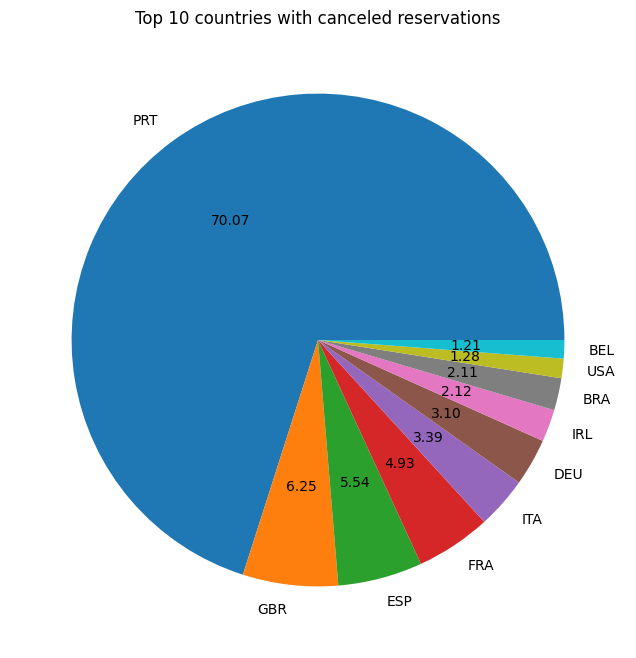

In [ ]:
canceled_data = df[df['is_canceled'] == 1]
top_10_countries = canceled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with canceled reservations')
plt.pie(top_10_countries, autopct = '%.2f', labels = list(top_10_countries.index))
plt.show()

In [ ]:
#Obtain the percentage of market_segments for all reservations

df['market_segment'].value_counts(normalize = True)

Online TA        0.474381
Offline TA/TO    0.203189
Groups           0.166585
Direct           0.104698
Corporate        0.042979
Complementary    0.006174
Aviation         0.001993
Name: market_segment, dtype: float64

In [ ]:
#Obtain the percentage of market_segments for cancelled reservations

canceled_data['market_segment'].value_counts(normalize = True)

Online TA        0.469706
Groups           0.273992
Offline TA/TO    0.187448
Direct           0.043487
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

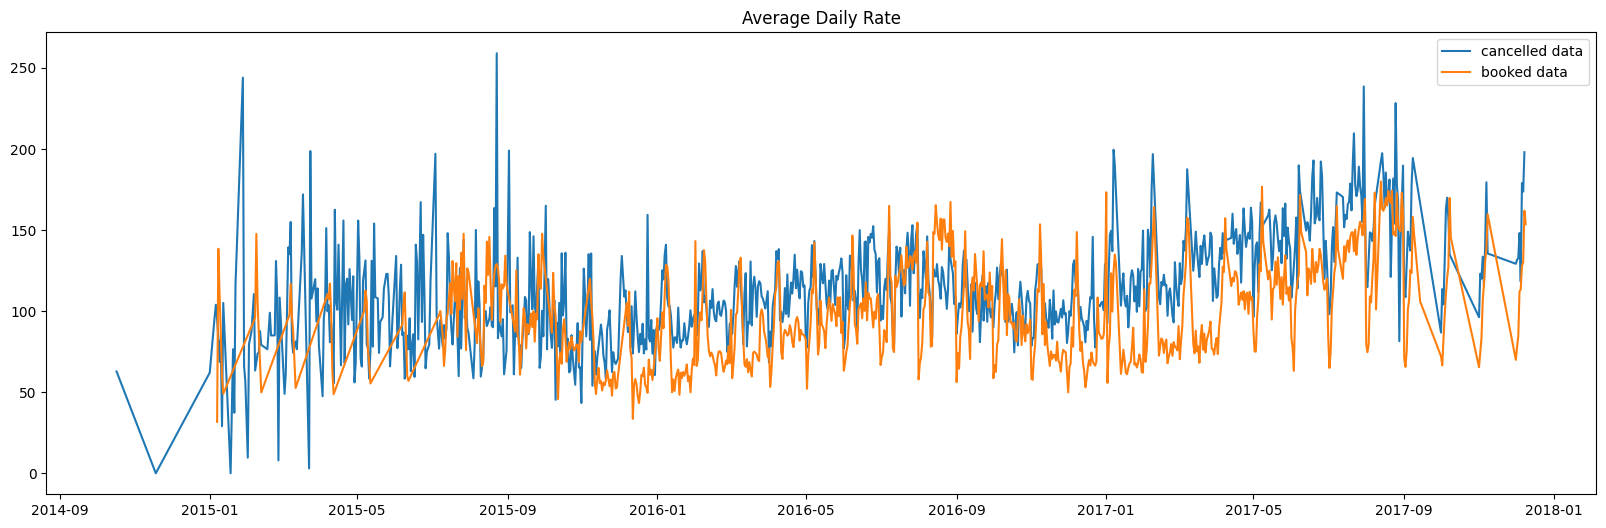

In [ ]:
cancelled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_canceled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled data')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'booked data')
plt.legend()
plt.show()

In [ ]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] > '2016') & (cancelled_df_adr['reservation_status_date'] < '2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date'] > '2016') & (not_cancelled_df_adr['reservation_status_date'] < '2017-09')]

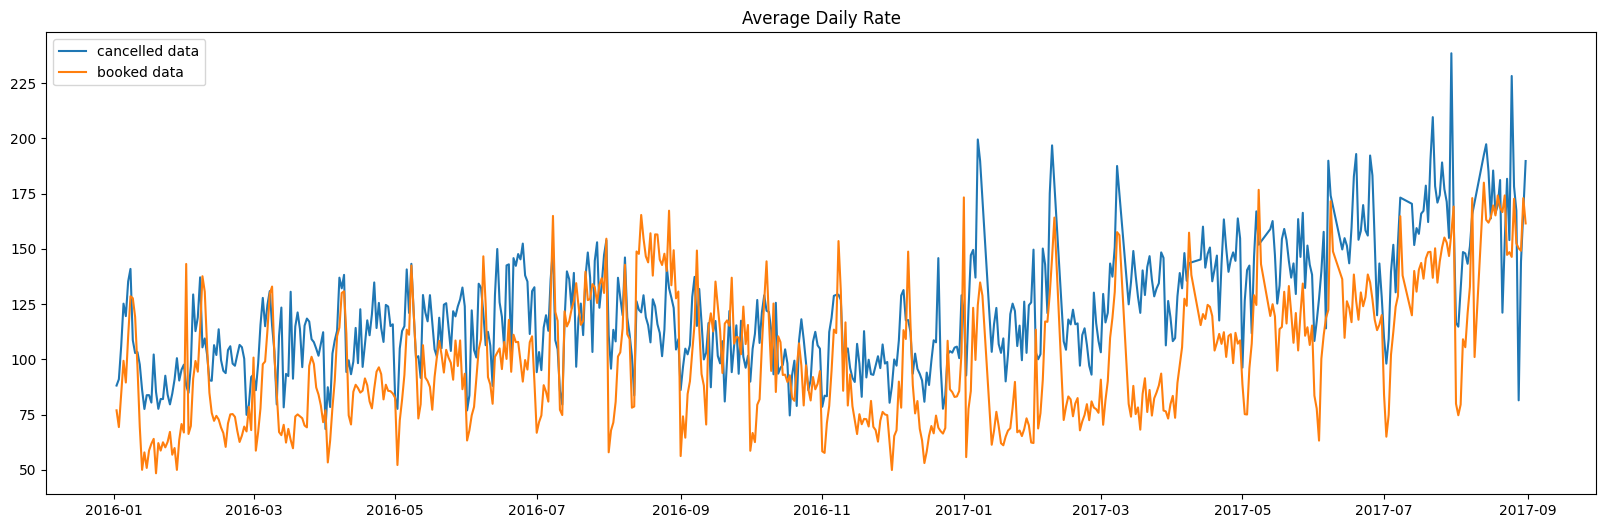

In [ ]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled data')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'booked data')
plt.legend()
plt.show()